<a href="https://colab.research.google.com/github/Leidypv/PI2-Rol_Data_Analyst/blob/main/Market%20Cap/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/cryptocurrency(01-01-2020 al 2023).csv')
# Visualización previa de los datos
data

,date,price,id,change_currency
0,2020-01-01,7195.153895,bitcoin,usd
1,2020-01-02,7193.754668,bitcoin,usd
2,2020-01-03,6963.853354,bitcoin,usd
3,2020-01-04,7300.346935,bitcoin,usd
4,2020-01-05,7351.377053,bitcoin,usd
...,...,...,...,...
9889,2022-12-28,0.000173,terra-luna,usd
9890,2022-12-29,0.000147,terra-luna,usd
9891,2022-12-30,0.000150,terra-luna,usd
9892,2022-12-31,0.000143,terra-luna,usd


In [ ]:
data.isnull().sum()

date               0
price              0
id                 0
change_currency    0
dtype: int64

In [ ]:
# conversión Dtype
data['date']= pd.to_datetime(data['date'])
data['id']= data['id'].astype('category')
data['change_currency']= data['change_currency'].astype('category')

In [ ]:
# Visulaización del tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9894 entries, 0 to 9893
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             9894 non-null   datetime64[ns]
 1   price            9894 non-null   float64       
 2   id               9894 non-null   category      
 3   change_currency  9894 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 174.5 KB


In [ ]:
data.describe()

,price
count,9894.000000
mean,3425.980926
std,10676.113320
min,0.000047
25%,0.154363
50%,1.254142
75%,288.559910
max,67617.015545


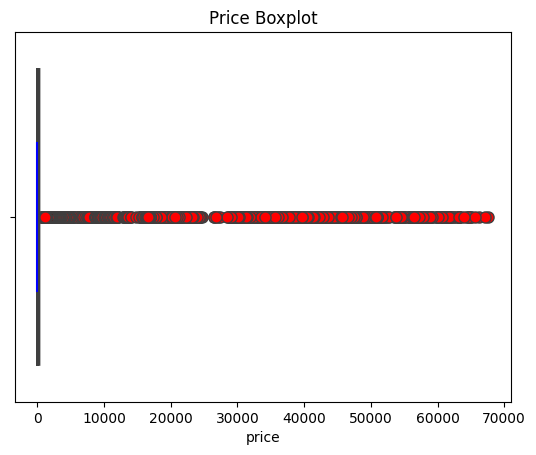

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="price",
            notch=True, showcaps=False,
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8},  # Personaliza los marcadores de valores atípicos
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "blue"},)

plt.title("Price Boxplot")
plt.show()


De acuerdo al resumen estadístico, observamos la amplia dispersión de los precios en la desviación estándar de aproximadamente de "10,676.11 USD", lo cual nos indica cuánto están variando los valores con respecto al promedio de "3,425.98 USD" en el mercado de la criptomoneda. Esto sugiere la presencia de valores atípicos, como podemos observar en el gráfico de Boxplot. Aunque no se identificaron patrones evidentes en los datos, es importante estar alerta a posibles patrones sutiles que podrían surgir en análisis más avanzados como: ciclos del mercado,analisis de sentimiento. Por otro lado, tenemos los valores mínimos que indican que al menos una criptomoneda tiene un precio extremadamente bajo de "0.000047 USD", así como valores máximos que indican que una criptomoneda tiene un precio muy alto de "67,617.01 USD".

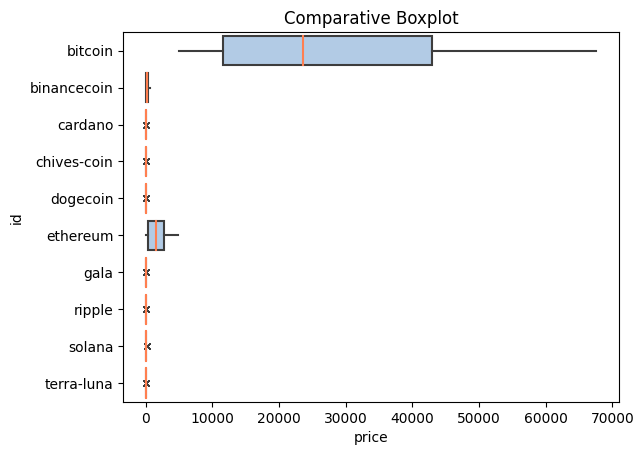

In [ ]:
sns.boxplot(
    data=data, x="price", y="id",
    showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)
plt.title("Comparative Boxplot")
plt.show()

Basándonos en el análisis estadístico, podemos confirmar a través de la siguiente gráfica comparativa que la criptomoneda bitcoin tiene el valor máximo de "67617.01 USD", mientras que ethereum muestra que el 25% de los valores son menores o iguales a "0.15 USD". No se observa la presencia de valores atípicos; sin embargo, se evidencia un patrón de aumento en el precio de la criptomoneda bitcoin, lo cual podría ser un indicio positivo para la inversión.

##Analisis de datos en el mercado

In [ ]:
market = pd.read_csv('/content/cryptocurrency(market data).csv')
# Visualización previa de los datos
market

,id,market_cap_rank,current_price,market_cap,total_volume,circulating_supply,total_supply,max_supply
0,bitcoin,1,29400.000,5.719047e+11,5.182436e+09,1.945564e+07,2.100000e+07,2.100000e+07
1,ethereum,2,1848.650,2.220799e+11,2.201579e+09,1.201458e+08,1.201458e+08,0.000000e+00
2,binancecoin,4,240.170,3.694207e+10,2.080155e+08,1.538562e+08,1.538562e+08,2.000000e+08
3,ripple,5,0.629,3.319503e+10,4.953720e+08,5.278728e+10,9.998852e+10,1.000000e+11
4,dogecoin,8,0.076,1.073722e+10,3.666894e+08,1.405679e+11,1.405678e+11,0.000000e+00
5,cardano,9,0.291,1.019975e+10,9.973258e+07,3.504502e+10,4.500000e+10,4.500000e+10
6,solana,10,24.900,1.010240e+10,2.643630e+08,4.059714e+08,5.547558e+08,0.000000e+00
7,gala,72,0.023,5.844614e+08,3.334934e+08,2.524264e+10,2.524259e+10,5.000000e+10
8,terra-luna,91,0.000,4.539490e+08,1.834693e+07,5.815965e+12,6.838990e+12,0.000000e+00
9,chives-coin,0,0.000,0.000000e+00,1.479720e+04,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10 non-null     object 
 1   market_cap_rank     10 non-null     int64  
 2   current_price       10 non-null     float64
 3   market_cap          10 non-null     float64
 4   total_volume        10 non-null     float64
 5   circulating_supply  10 non-null     float64
 6   total_supply        10 non-null     float64
 7   max_supply          10 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 768.0+ bytes


In [ ]:
columns_to_format = ['current_price','market_cap','total_volume','circulating_supply','total_supply','max_supply']
market = market[['id','market_cap_rank'] + columns_to_format]
market[columns_to_format] = market[columns_to_format].applymap(lambda x: format(x, '.3f'))
market

,id,market_cap_rank,current_price,market_cap,total_volume,circulating_supply,total_supply,max_supply
0,bitcoin,1,29400.000,571904683058.000,5182436080.000,19455643.000,21000000.000,21000000.000
1,ethereum,2,1848.650,222079892987.000,2201578895.000,120145768.369,120145768.369,0.000
2,binancecoin,4,240.170,36942074578.000,208015521.000,153856150.000,153856150.000,200000000.000
3,ripple,5,0.629,33195025874.000,495372011.000,52787284454.000,99988519823.000,100000000000.000
4,dogecoin,8,0.076,10737218362.000,366689404.000,140567896383.705,140567806383.705,0.000
5,cardano,9,0.291,10199754034.000,99732585.000,35045020830.323,45000000000.000,45000000000.000
6,solana,10,24.900,10102399405.000,264363033.000,405971377.890,554755847.474,0.000
7,gala,72,0.023,584461414.000,333493368.000,25242635391.517,25242592722.366,50000000000.000
8,terra-luna,91,0.000,453949012.000,18346934.000,5815965380628.710,6838989784038.090,0.000
9,chives-coin,0,0.000,0.000,14797.200,0.000,0.000,0.000


In [ ]:
# Cambiar type
market['id']= market['id'].astype('category')
market['market_cap_rank']= market['market_cap_rank'].astype('int')
convert =['current_price','market_cap','total_volume','circulating_supply','total_supply','max_supply']
market[convert]= market[convert].astype('float')
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  10 non-null     category
 1   market_cap_rank     10 non-null     int64   
 2   current_price       10 non-null     float64 
 3   market_cap          10 non-null     float64 
 4   total_volume        10 non-null     float64 
 5   circulating_supply  10 non-null     float64 
 6   total_supply        10 non-null     float64 
 7   max_supply          10 non-null     float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 1.1 KB


In [ ]:
import warnings
warnings.filterwarnings('ignore')
market.corr(method='pearson',min_periods=1)

,market_cap_rank,current_price,market_cap,total_volume,circulating_supply,total_supply,max_supply
market_cap_rank,1.000000,-0.220869,-0.305187,-0.291454,0.759209,0.758524,0.055233
current_price,-0.220869,1.000000,0.950778,0.941246,-0.125639,-0.125890,-0.214148
market_cap,-0.305187,0.950778,1.000000,0.996161,-0.179081,-0.179152,-0.241552
total_volume,-0.291454,0.941246,0.996161,1.000000,-0.199943,-0.200083,-0.213715
circulating_supply,0.759209,-0.125639,-0.179081,-0.199943,1.000000,0.999975,-0.194175
total_supply,0.758524,-0.125890,-0.179152,-0.200083,0.999975,1.000000,-0.188991
max_supply,0.055233,-0.214148,-0.241552,-0.213715,-0.194175,-0.188991,1.000000


In [ ]:
import seaborn as sns
corr_df = market.corr(method='pearson')
corr_df.style.background_gradient(cmap="coolwarm")

,market_cap_rank,current_price,market_cap,total_volume,circulating_supply,total_supply,max_supply
market_cap_rank,1.000000,-0.220869,-0.305187,-0.291454,0.759209,0.758524,0.055233
current_price,-0.220869,1.000000,0.950778,0.941246,-0.125639,-0.125890,-0.214148
market_cap,-0.305187,0.950778,1.000000,0.996161,-0.179081,-0.179152,-0.241552
total_volume,-0.291454,0.941246,0.996161,1.000000,-0.199943,-0.200083,-0.213715
circulating_supply,0.759209,-0.125639,-0.179081,-0.199943,1.000000,0.999975,-0.194175
total_supply,0.758524,-0.125890,-0.179152,-0.200083,0.999975,1.000000,-0.188991
max_supply,0.055233,-0.214148,-0.241552,-0.213715,-0.194175,-0.188991,1.000000


En el gráfico de correlación, apreciamos una fuerte correlación positiva entre la variable market_cap de las criptomonedas con mayor capitalización en el mercado y total_volume que representa un mayor volumen
total en las operaciones, Este es un indicador importante especialmente al considerar criptomonedas populares como bitcoin, como lo vimos en el anterior analisis nos dio indicio positivo para la
inversión. Al ser una criptomoneda popular con una alta capitalización en el mercado a menudo atrae interés,lo que se valida en la relación positiva observada con current_price que representa un
precio por unidad mas alto y nos lleva a un mayor volumen de operaciones.
Por otro lado, la correlación negativa con market_cap_rank reflejar como las criptomonedas lideres con mayor capitalización se clasifican en un rago de capitalización mas bajo en el mercado
como es el caso de bitcoin con su posición de liderazgo en el mercado.Sin embargo, esto no indica que no es un buen rango . De hecho es una señal de su posición líder en el mercado
como lo mencionamos anteriormente.